## Convolução 2D

Agora já podemos começar a trabalhar com imagens!! A convolução **2D** consiste em deslocar um kernel ao longo do dado, podendo desta vez se deslocar em duas dimensões. Igualmente, o kernel também pode possuir duas dimensões.



In [1]:
from skimage import io, color, transform, data
from scipy.signal import convolve
import matplotlib.pyplot as plt
import numpy as np

Vamos assumir que buscamos **detectar bordas em imagens**. Usaremos como exemplo a imagem de uma parede de tijolos:
```python
img = data.brick()
```

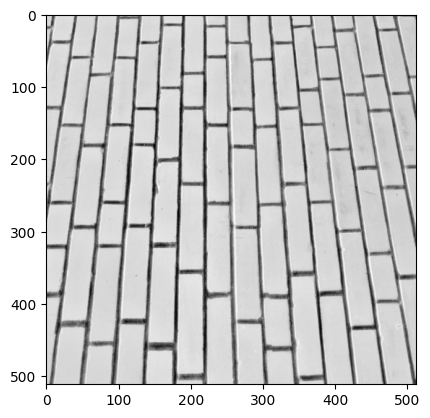

In [2]:
img = data.brick()
plt.imshow(img, cmap='Greys')

Para nos auxiliar daqui pra frente, vamos definir um método para imprimir os kernels como imagens.

In [3]:
def show(valores, title):
  plt.figure(figsize=(len(valores), len(valores) ))
  plt.imshow(valores, cmap='gray')
  for i, line in enumerate(valores):
    for j, col in enumerate(line):
      plt.text(j, i, '{:.0f}'.format(col), fontsize=16, color='red', ha='center', va='center')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.savefig(title+'.png', format='png', dpi=100, bbox_inches='tight')

Vamos agora definir dois kernels diferentes:
* Kernel de bordas **verticais**
* Kernel de bordas **horizontais**


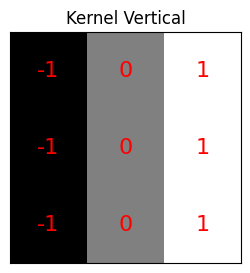

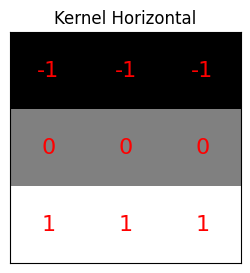

In [4]:
kernel_v = [ [-1, 0, 1],
             [-1, 0, 1],
             [-1, 0, 1]]

show(kernel_v, 'Kernel Vertical')

kernel_h = [ [-1, -1, -1],
             [0, 0, 0],
             [1, 1, 1]]
show(kernel_h, 'Kernel Horizontal')

Vamos agora convoluir ambos os kernels com a parede de tijolos e observar o resultado. Cada kernel destacará partes diferentes da imagem!!

O resultado da convolução entre o dado e o kernel é chamado de **Mapa de Características** ou **Mapa de Ativação**.

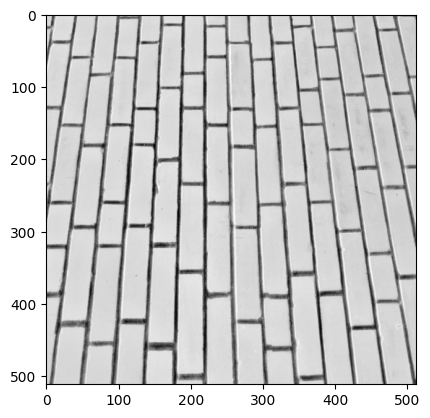

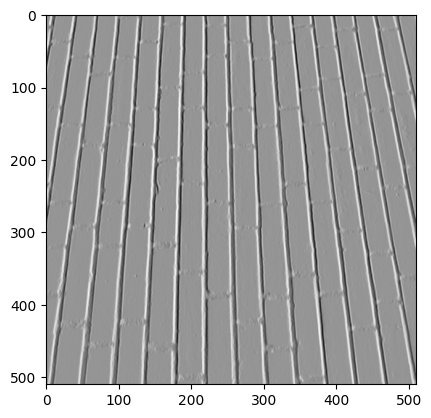

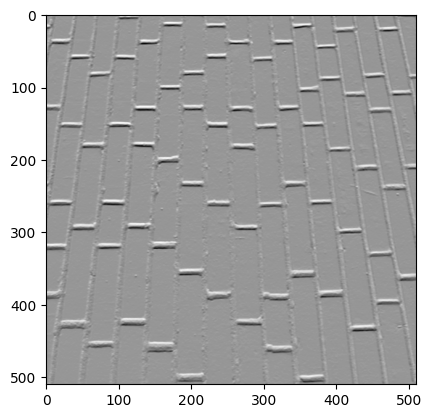

In [5]:
mapa_de_caracteristicas = convolve(img, kernel_v, mode='valid')
plt.imshow(img, cmap='Greys')

plt.figure()
plt.imshow(mapa_de_caracteristicas, cmap='Greys')

mapa_de_caracteristicas = convolve(img, kernel_h, mode='valid')
plt.figure()
plt.imshow(mapa_de_caracteristicas, cmap='Greys')

### Uma observação sobre as ativações

Quando definimos o kernel, ele buscará o padrão para o qual foi definido, mas vale observar melhor o seu comportamento.
Vamos imprimir o kernel original, e a sua versão invertida que é de fato operada com a imagem durante a convolução.

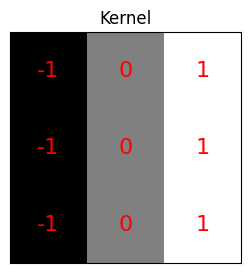

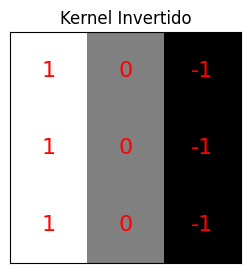

In [6]:
show(kernel_v, 'Kernel')
show(np.flip(kernel_v), 'Kernel Invertido')

Vamos aplicar esse kernel a uma imagem que talvez você conheça. A logo de uma empresa de cursos online em tecnologia e marketing digital!